# Frequency Bands and Transmission Safety

This notebook will introduce the Radio Frequency (RF) band, showing the importance of this band through relevant frequencies. Time will also be spent covering Nyquist Zones and how these relate to the relevant frequency bands.

Additionally, this notebook will introduce transmission safety - becoming aware of licensed and unlicensed frequency bands as well as environmental transmission concerns. 

## Introduction to the Radio Frequency (RF) band

### Radio Fundamentals

Radio systems convey information on a Radio Frequency (RF) band. A standard transmitter and receiver setup can be seen in the diagram below.

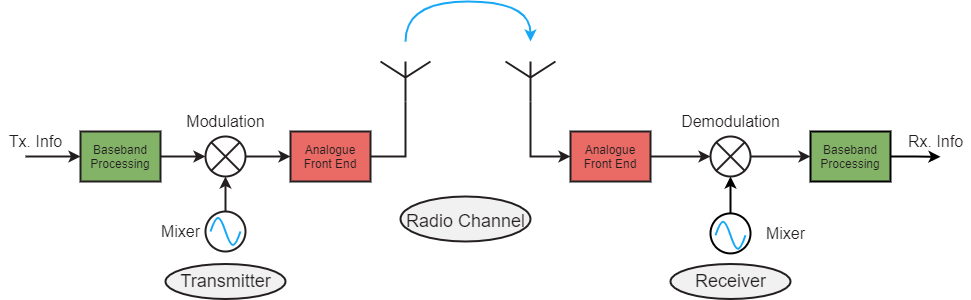

Such a system works by modulating a low frequency baseband signal to a desired RF frequency at the transmitter side and by demodulating from the RF frequency back to the baseband signal at the receiver. More information on modulation and demodulation can be found at this [notebook](./Modulation_Demodulation.ipynb).

### Nyquist Zones

**Nyquist Sampling Rate**

If a baseband, bandlimited signal is composed of sine waves up to a frequency $f_{b}$ Hz, then the Nyquist Frequency is:

$$ f_{n} = 2f_{b}$$

If we require to sample this signal and retain all information, then the sampling rate, $f_{s}$, must be chosen as:

$$f_{s} > f_{n} = f_{s} > 2f_{b}$$

This frequency is often referred to as the Nyquist sampling rate, (distinct from the Nyquist frequency!).

**Aliasing**

When a (baseband) signal is sampled at a frequency *below* the Nyquist rate, then we "lose" the signal frequency information and **aliasing** is said to have occurred. Aliasing can be illustrated by sampling a sine wave at below the Nyquist rate and then "reconstructing". We note that it appears as a sine wave of *lower* frequency.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import *

fs = 1000 # sample rate 
n_window = fs # fft size

In [2]:
samples = np.arange(fs) # the points on the x axis for plotting - 0 to fs
t = samples/fs #samples per sampling rate - amount of time passed to process number of samples - array

freqs = np.fft.fftshift(np.fft.fftfreq(n_window,1/fs)) #frequency domain axis for graphs

Here we define three signals, each composed of 3 sine waves:

$$w(t) = 100\sin(2 \pi 100 t) + 50\sin(2 \pi 250 t) + 25\sin(2 \pi 400 t)$$

$$x(t) = 100\sin(2 \pi 900 t) + 50\sin(2 \pi 750 t) + 25\sin(2 \pi 600 t)$$

$$y(t) = 100\sin(2 \pi 1100 t) + 50\sin(2 \pi 1250 t) + 25\sin(2 \pi 1400 t)$$

In [3]:
w = 100*np.sin(2*np.pi*100*t) + 50*np.sin(2*np.pi*250*t) + 25*np.sin(2*np.pi*400*t)
x = 100*np.sin(2*np.pi*900*t) + 50*np.sin(2*np.pi*750*t) + 25*np.sin(2*np.pi*600*t)
y = 100*np.sin(2*np.pi*1100*t) + 50*np.sin(2*np.pi*1250*t) + 25*np.sin(2*np.pi*1400*t)

In [4]:
w_fft_db = find_fft(w, n_window)
x_fft_db = find_fft(x, n_window)
y_fft_db = find_fft(y, n_window)

By plotting the FFTs of these signals sampled at 1000 Hz we can see the effects of aliasing - all three signals have been aliased, to 100, 250 and 400 Hz components respectively. Clearly if a signal has frequency components greater than $\frac{f_{s}}{2}$ then aliasing will occur, manifesting as a distortion of a signal. 

From a knowledge of $f_{s}$ and the input frequencies it is straightforward to establish the frequency of the aliased components for any given components above $\frac{f_{s}}{2}$. The reconstructed signal has a frequency of:

$$f_{s} - f_{signal} = f_{reconstructed}$$

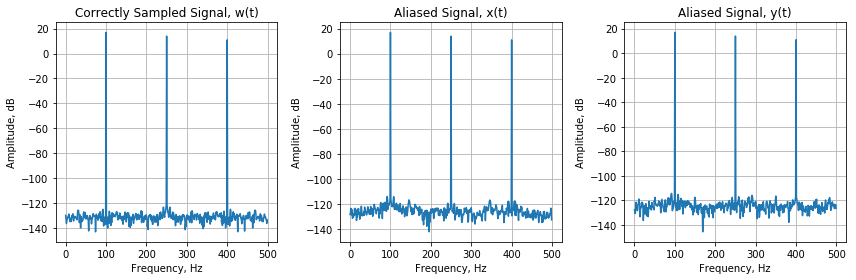

In [5]:
title1 = "Correctly Sampled Signal, w(t)"
title2 = "Aliased Signal, x(t)"
title3 = "Aliased Signal, y(t)"

tripleSubplots(w_fft_db, x_fft_db, y_fft_db, samples, freqs, fs, title1, title2, title3)

In our example, we sampled three signals each at 1000 Hz. If we sample a sum of a few sine waves, *w(t)*, at 1000 Hz we adhere to the Nyquist criteria. We can represent the signal to be sampled as a simple (sine wave amplitude) spectrum:

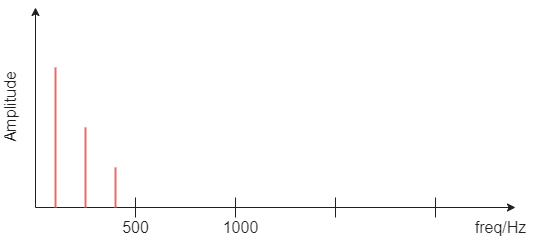

Of course, if we had sampled the signal, *x(t)* (i.e. sine waves at 900 Hz, 750 Hz and 600 Hz) at 1000 Hz, then because the Nyquist criteria is not met, all of these sine waves will alias respectively to 100, 250 and 400 Hz components.

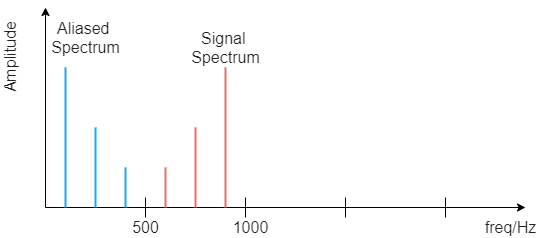

Similarly, if we sampled the signal *y(t)* (i.e. sine waves at 1100 Hz, 1250 Hz and 1400 Hz) at 1000 Hz, then as the Nyquist criteria is not met, all of these sine waves will alias respectively to 100, 250 and 400 Hz components. 

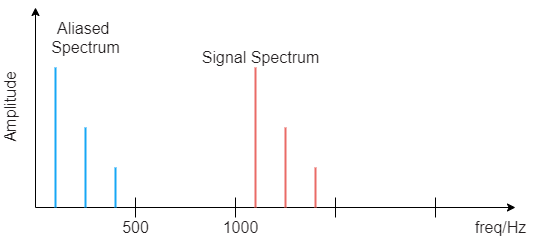

We can then note a pattern of spectrum aliasing as shown below:

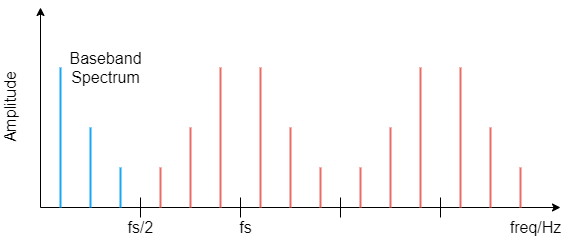

Clearly the above system sampling at 1000 Hz would be best limited to only have input signals with frequencies below 500 Hz. However, **aliasing can be exploited**, such as in situations where we wish to demodulate a signal. If this signal is appropriately bandlimited, the output signal will alias to the same "shape" at baseband frequencies. This general process is called undersampling, and is applicable in software defined radio systems for the direct demodulation of received signals. 

**Nyquist Zones**

Noting the 'folding' of signal spectra that was observed in the previous example, around integer multiples of $\frac{f_{s}}{2}$, we can define these regions of the frequency spectrum as **Nyquist Zones**.

For example, if the signal was sampled at $f_{s}$, any signal components present at a 'red' frequency shown in the diagram would alias down to the corresponding 'blue' position in the baseband region.

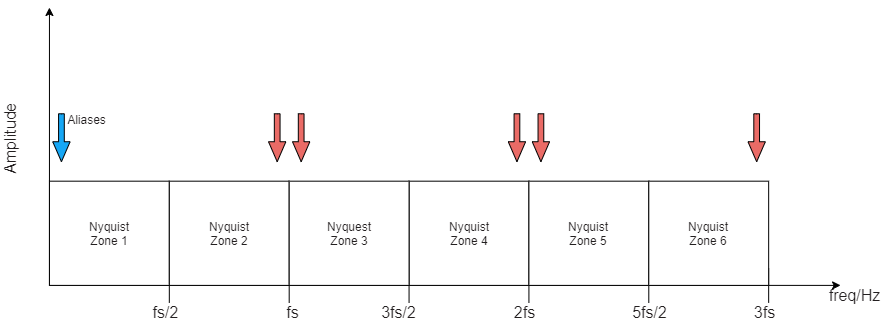

An analogue lowpass filter is needed to retain the frequencies in Nyquist Zone 1, and attenuate any components at higher frequencies that would otherwise alias into this region. Similarly, if we wanted to exploit aliasing from a higher Nyquist Zone, a suitable analogue bandpass filter would be required, to ensure that only the desired signal components alias into Nyquist Zone 1. 

For example, suppose that the signal of interest resides entirely in Nyquist Zone 5, and that unwanted signal components exist in Bands 4 and 6. To avoid the unwanted signal components also being aliased to the baseband region, and being superimposed onto the desired signal, a bandpass filter must be applied around Nyquist Zone 5 prior to sampling.

*What Nyquist zone examples are possible? - any notebooks available?*

### The RF Spectrum

Useable radio frequencies for communications start at the low kHz, with AM radio appearing around 600 kHz to 1800 kHz. FM radio then appears from around 88 MHz, and the useable RF communication spectrum is all of the way to 10's of GHz (so called mm waves noting the wavelength is indeed of millimetres in length).

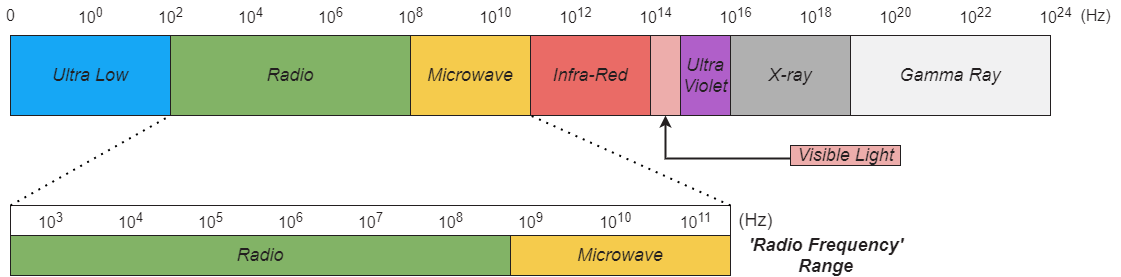

With modern ADCs capable of sampling at multiple GHz, the RF frequencies of many wireless bands can be directly digitised. For example, with 4 GHz sampling, signals in the 1st Nyquist Zone (i.e. 0 to 2 GHz) can be digitised in the conventional manner. With an RFSoC, signals in the 2nd Nyquist Zone can also be captured by exploiting aliasing, provided that an appropriate bandpass filter first removes any components present at other frequencies. Indeed, the 3rd Nyquist Zone and higher can also be used in the same way - provided that suitable analogue filtering is applied.

Sampling signals in the **1st Nyquist Zone** (0 to 2 GHz) allows several common signal types to be captured, including: 

- GNSS navigation systems (several bands from 1.164 GHz to 1.610 GHz)


- Broadcast television (~470 to 700 MHz)


- IoT standards LoRa (867 - 869 MHz, 902 - 928 MHz) and NB-IoT (bands include 800 MHz and 1.8 GHz)


- Several cellular bands (e.g. 800 MHz, 900 MHz, 1.4 GHz, 1.8 GHz in the UK)


*Spectrum Analyser of Broadcast Television*

Extending to the **2nd Nyquist Zone** (2 GHz to 4 GHz), additional signal types can also be received, such as:

- 2.4 GHz WiFi band (2.4 to 2.5 GHz)


- Bluetooth (2.45 GHz)


- Citizens Broadband Radio Service (CBRS) in the USA (3.55 GHz to 3.7 GHz)


- Cellular bands (2.1 GHz, 2.3 GHz, 2.6 GHz)

*Spectrum Analyser of WiFi band*


The **3rd Nyquist Zone** would bring further possibilities including:

- 5GHz WiFi band (5.15 to 5.725 GHz)


*Spectrum Analyser - 5GHz WiFi band*

Usually, larger bandwidths are available in higher frequency bands, and therefore high data rate services favour high RF frequencies. This is balanced against the disadvantage of increased path loss at higher frequencies. Therefore, there is a move towards three different bands for 5G, each catering to a different point in the trade-off between range (coverage) and available data rate.

## What Bands to Transmit Over?

The frequency spectrum can be thought of as divided into three sections - the licensed spectrum, shared spectrum and license-exempt spectrum. It is of the utmost importance that a user is mindful of which band they fall into and especially that an unlicensed user transmits safely within the registered license-exempt spectrum.

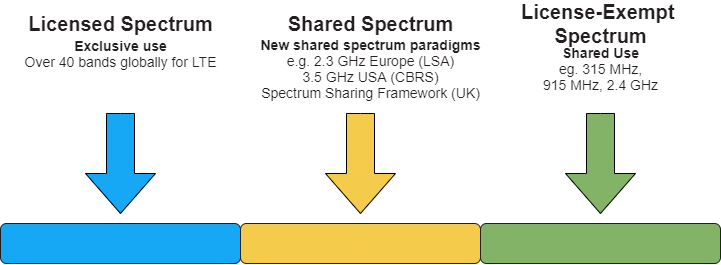

### Regulators and Spectral Assignment

Wireless communications via RF is now an essential part of life for many people. Whether it is wireless network access in offices, mobile basestation backhaul, consumers texting, using voice and video communications or social media, it is likely at some point that they will be communicating over various frequency bands using standards such as Bluetooth, WiFi, GSM, and LTE. Planning and licensing is required in order to set rules about power levels, and ensure that interference does not occur between different broadcasters. 

Every country has its own national spectrum regulator (e.g. the Office of Communications (Ofcom - https://www.ofcom.org.uk/home) in the UK, and the Federal Communications Commission (FCC - https://www.fcc.gov/) in the USA), which oversees the classification of bands and the licensing of spectral resources to particular users within their jurisdiction. There can be large differences between frequency bands, for example in the UK there are currently no mobile phone service frequencies below 800 MHz, whereas in some countries in Eastern Europe, they operate down as low as the 400 MHz UHF band.

However, these regulators do not have total control and must obey rules at an international level, as defined by the International Telecommunications Union (ITU - https://www.itu.int). This is in an attempt to harmonise bands where possible (particularly in areas where countries have borders). The ITU defines three regions:

- **ITU Region 1**: Europe, Russia, Africa, and the Middle East.
- **ITU Region 2**: Americas, and Greenland.
- **ITU Region 3**: Australia, Indonesia, Japan, New Zealand, the South Pacific, Asia south of Siberia

Each region has its own management body, such as the European Telecommunications Standards Institute (ETSI). The aim of such a body is to harmonise frequency bands so that equipment designed to work in one country will likely work in others; which helps bring costs down. An example of successful global harmonisation is WiFi (the IEEE 802.11 standard) which operates on the 2.4 GHz band. FM radio is also pretty standard across most countries, in the 88 MHz to 108 MHz band, and nearly all radio stations are spaced at least 200 KHz apart. When frequencies are harmonised, equipment designed to work in one country will likely work in others; which helps bring costs down. 

Each country has a Frequency Allocation Table (FAT) which shows the full allocation of the frequency spectrum. An example FAT for each region can be seen:

[Region 1 - UK Frequency Allocation Table](http://static.ofcom.org.uk/static/spectrum/fat.html)

[Region 2 - FCC Spectrum wall chart](https://www.ntia.doc.gov/files/ntia/publications/spectrum_wall_chart_aug2011.pdf)

[Region 3 - Australian Radiofrequency Spectrum Plan](https://www.acma.gov.au/australian-radiofrequency-spectrum-plan)

### Licensed Spectrum

The frequency spectrum is limited to a finite number of frequencies and if there are too many transmissions on any band at the same time, it would become impossible to successfully receive any signals due to interference. Therefore, government agencies, (for example Ofcom in the UK, FCC in the USA), are tasked with licensing the spectrum to specific users so that it is efficiently used. The majority of the spectrum is licensed to users such as television and radio broadcasters. Companies pay a licensing fee for the right to transmit on an assigned frequency within a certain area, ensuring nothing will interfere with their transmission.

Some of the key license holders and available licenses are highlighted below.

**Amateur radio** 

One of the easiest ways to gain access to the licensed spectrum is through an amateur radio license. This is a hobby service which uses designated frequencies for non-commercial communications. There are a large number of bands which are available to an amateur radio user:

- 135.7 KHz to 146 MHz (ITU Region 1)
- 135.7 KHz to 250 GHz (ITU Region 2)
- 135.7 KHz to 1.3 GHz (ITU Region 3)

However, the high frequency (HF) bands (3.5 to 28.7 MHz) are by far the most common for amateur radio, as this gives local and worldwide access at almost any time with the minimal interference.

*could do a spectrum analyser here*


**Business radio**

Business radio users are companies which utilise radio as a tool to support business operations, such as dispatching vehicles, coordinating workers or remotely controlling equipment. The available frequency bands for such companies vary depending on region. 

In the USA, the FCC makes several bands available between 25 MHz and 1.4 GHz.

For the UK, Ofcom bands range from 77 MHz to 458 MHz.

**Mobile and Broadcast Networks**

As previously stated the majority of the spectrum is licensed by large mobile and broadcast companies. These frequencies are not available to the average user and care should be taken to avoid these frequencies.

In the UK there are a total of 9 frequencies used for 2G, 3G, 4G and 5G services:

800 MHz, 900 MHz, 1.4 GHz, 1.8 GHz, 2.1 GHz, 2.3 GHz, 2.6 GHz FDD, 2.6 GHz TDD and 3.4 GHz.

In the USA:

600 MHz, 700 MHz, 850 MHz, 1.7 GHz, 1.9 GHz, 2.1 GHz, 2.3 GHz, 2.5 GHz, 28 GHz, 39 GHz 


Additionally, it is common for large bands to be reserved for particular types of use, for example FM radio (88-108 MHz) and Digital Terrestrial Television (470-700 MHz UK). 

*I wanted to talk about more international mobile and broadcast frequencies but this section is a bit messy already. Don't care for the lists of frequencies and adding more seems bad*

### Shared Spectrum

If any FATs were to be observed it would appear that the frequency spectrum is at 'bursting point' - there are very few undefined areas of the spectrum and the license costs for those that are not yet allocated are expensive. Yet upon further inspection, large parts of the spectrum are actually underutilised or not in use at all. There can be a number of reasons for this, such as when transmitted signals fail to diffract around hills and buildings, when licensed spectrum is hoarded for future use or when a company does not see a strong enough 'business case' for them to operate in a particular area.

Therefore, the spectrum shortage is actually caused by the static allocation policy not a physical shortage of available spectrum. To address this issue, Ofcom introduced the Shared Access License (SAL) in the UK in July 2019. This is a 'use it or lose it' scheme - if any licensed frequency bands were not in use or were planned to be used then this new license would allow localised access to these spectrum bands. This was driven from a desire to implement 4G and 5G mobile networks, using LTE technologies in these shared bands to result in increased throughput and efficiency. This license is currently available in four spectrum bands:

- 1.8 GHz band (1781.7 to 1785 MHz, 1876.7 to 1880 MHz)
- 2.3 GHz band (2.39 to 2.4 GHz)
- Entire 3.8 to 4.2 GHz band
- 26 GHz band (24.25 to 26.5 GHz) - only available for indoor low power licenses

In addition, Ofcom will now consider localised sharing requests for all other Major Network Operator (MNO) licensed bands, in locations they are not being utilised, through the Local Access License (LAL) framework. 

Similar schemes have been proposed by ETSI, with Licensed Shared Access on the 2.3 GHz band and in the USA with 3.5 GHz Citizens Broadband Radio Service (CBRS).

### License-Exempt Spectrum

License exempt devices typically fall into one of two categories:

- Short Range Devices (SRDs)
- Industrial, Scientific and Medical (ISM) purposes, other than telecommunications. This includes, for example, microwave ovens and medical diathermy machines.

SRDs are by far the most common use of the license-exempt spectrum, encompassing commercial and hobby use. Typical SRD applications include:

*is there too much info here?*

- Wideband data transmission: RLAN, WiFi, White Space Devices, Wideband Low Activity Mode (WLAM) and short range video
- RFID, medical implants, health monitoring, personal identification, inductive systems, proximity sensors
- Car door keys, transport and traffic telematics, road tolling, intelligent transportation systems, automatic meter reading, street lamp monitoring and control, railway applications, car immobilisers
- Logistics, livestock, electronic surveillance
- Radiodetermination: Automotive Short Range Sensor, RF level gauges, radar sensor, level probing radar
- Near field communication (NFC) and voice transmission: walkie-talkie, baby monitors, remote control, radio microphone, cordless telephones, hearing aids
- Telemetry, tracking, tracing and data acquisition, machine to machine control, home automation, automotive industry, sensor monitoring
- Car alarms, anti-theft alarms

The unlicensed spectrum is divided into ISM and non-ISM bands, however both are available for SDR use. There are a small number of common frequencies which a user should be particularly aware of:

**27 MHz**

For the USA, Citizens Band Radio (CBR) is available at the 27 MHz band. This is a short range radio service for both hobby and business use, designed for use without qualification and without causing interference. This band can be used for many common transmission applications such as baby monitoring, model vehicle control, and car alarms.

**315 MHz**

This band is unlicensed in Region 2 and Region 3.

**433 MHz**

Otherwise known as LPD433 (Low Power Devices), the 433 MHz band is a common license-exempt band in Region 1 and Region 3 territories, where it is often used for voice transmission, model control and remote keyless entry systems.

It should be noted that this is a licensed amateur radio band in Region 2 territories.

**868 MHz**

In Region 1 this band has been allocated for license free operation, most commonly for long-range communication between devices. 

**915 MHz**

This band is unlicensed in Region 2 and Australia.

**2.4 GHz**

The WiFi band at 2.4 GHz is unlicensed worldwide and is likely the greatest achievement in frequency harmonization. A wide range of devices, commercial and amateur, access this band on a daily basis.

*spectrum analyser diagrams for some/all of these frequencies* 

## Environment Safety

When operating any RF transmitter, it is important to be considerate of health and safety concerns. In each region, spectrum users are regulated on transmission power and safe exposure to RF fields. For example, the FCC in America limits the transmission power of Amateur Radio Stations to 1500 W, with most using considerably below this maximum. Publications are available to assist with specific use cases.

The transmission power of an RFSoC is far below levels necessary to cause concerns. Despite this, additional care must be taken to be aware of surroundings when transmitting, avoiding interference with sensitive equipment, for example, medical devices or older electronic pacemakers.

University Of Strathclyde &copy;